## Libraries

In [2]:
import pandas as pd #dataframes e series
import matplotlib.pyplot as plt #graphics
import numpy as np #matrixes
import csv #read files
import nltk #Tokenize
import re #RegEx
import string 
import collections
import scipy #Sparse Matrixes

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer #tf-idf; tf
from sklearn.naive_bayes import MultinomialNB #Naïve Bayes
from sklearn import metrics #Evaluation
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize
from sklearn import svm
from sklearn.feature_selection import SelectFromModel
import multiprocessing
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
from ipywidgets import FloatProgress
from IPython.display import display

In [47]:
plt.rcParams['figure.figsize'] = (11,6)
plt.style.use('ggplot')

In [8]:
count = Trainingtable.toxic + Trainingtable.severe_toxic + Trainingtable.insult + Trainingtable.threat + Trainingtable.obscene + Trainingtable.identity_hate

In [6]:
Trainingtable = pd.read_csv('Recursos/comments_toxicos/Dados/train.csv')
Testtable = pd.read_csv('Recursos/comments_toxicos/Dados/test.csv')

In [7]:
label_cols = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [9]:
Trainingtable['sum'] = count

In [25]:
Trainingtable.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,uppercase_count,swear_count
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,17,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,8,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,4,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,11,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,2,0


In [7]:
Trainingcomments = Trainingtable.comment_text
Testcomments = Testtable.comment_text

In [ ]:
num_rows = Trainingtable.shape[0] #Número de linhas
num_missing = num_rows - Trainingtable.count()

In [ ]:
print(Trainingtable.comment_text.value_counts(dropna=False)) # Print da ocorrência de valores numa dada coluna

In [ ]:
Trainingtable.describe()

In [ ]:
subset = Trainingtable.iloc[[42, 44], [3]]
subset

In [ ]:
Trainingtable.groupby('toxic').mean()

   Para qualquer feature, P(toxic|feature = true) = 93%, excepto P(toxic|severe_toxic = true) = 100 %  
   P(toxic)= 9,5844%  


In [ ]:
Trainingtable['f_sum']= (summ) #adicionar nova coluna à tabela de treino

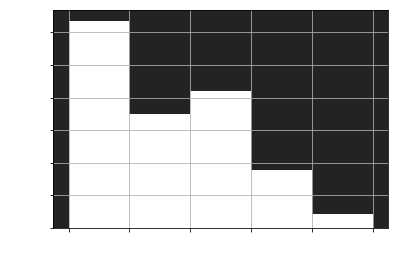

In [16]:
plt.hist(Trainingtable[Trainingtable['sum'] != 0]['sum'],color = 'white', bins = 5)
plt.grid(True)
plt.show() #histograma da soma de características negativas
labelx = plt.xlabel('Nº de Infrações')
plt.rcParams['axes.facecolor'] = '#232323'
labely = plt.ylabel('Nº de comentários')
labelx.set_color('white')
labely.set_color('white')
ticksx = plt.xticks(color = "white")
ticksy = plt.yticks(color = "white")

In [15]:
Trainingtable[Trainingtable['sum'] != 0]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,1
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,1
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,4
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,3
44,001956c382006abd,I'm Sorry \n\nI'm sorry I screwed around with ...,1,0,0,0,0,0,1
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0,2
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0,4
56,0020fd96ed3b8c8b,=Tony Sidaway is obviously a fistfuckee. He lo...,1,0,1,0,1,0,3
58,0021fe88bc4da3e6,My Band Page's deletion. You thought I was gon...,1,0,1,0,0,0,2


In [ ]:
summ6 = summ[summ == 6]
for i in summ6.index:
    print(Trainingtable['comment_text'][i])  #Print dos comentários que infringem todas as  para ver padrões

In [8]:
comments = Trainingtable['comment_text']
uppercasecount = pd.Series()
for i in range(comments.shape[0]): 
    comment = comments[i]
    count = 0
    for c in comment:
        if c.isupper():
            count += 1 
    uppercasecount = uppercasecount.append(pd.Series([count], index = [i])) 

In [9]:
Trainingtable['uppercase_count'] = uppercasecount #Inserir o número de maiúsculas por comentário na tabela de treino

In [50]:
Trainingtable[['sum','uppercase_count', 'swear_count']].groupby('sum').mean()

,uppercase_count,swear_count
sum,,
0,14.236993,0.032753
1,32.999686,0.860063
2,26.932471,0.890805
3,36.530767,2.734854
4,106.406818,8.229545
5,124.948052,10.155844
6,149.064516,5.258065


In [11]:
with open('C:/Users/sergiojesus/Desktop/Recursos/comments_toxicos/full-list-of-bad-words-banned-by-google.csv') as f:
    reader = csv.reader(f)
    swearsBoW = list(reader)
for i in range(1,len(swearsBoW)):
    for word in swearsBoW[i]:
            swearsBoW[0].append(word)
swearsBoW = swearsBoW[0]
newlist= list()
for word in swearsBoW:
    newword = word.strip()
    newword2 = newword.lower()
    newlist.append(newword2)
swearsBoW = newlist

In [14]:
swear_count = pd.Series()
wordlist = [comment.split() for comment in comments]
commentcount = 0
for sentence in wordlist:
    count = 0
    for word in sentence:
        lowerword = word.lower()
        if lowerword in swearsBoW:
            count += 1
    swear_count = swear_count.append(pd.Series([count], index = [commentcount]))
    commentcount += 1
    f.value = commentcount

In [15]:
Trainingtable['swear_count'] = swear_count

In [16]:
Trainingtable[['sum','swear_count']].groupby('sum').mean()

KeyError: "['sum'] not in index"

In [19]:
Trainingtable['uppercase_count'].describe()

count    159571.000000
mean         17.159628
std          96.528103
min           0.000000
25%           3.000000
50%           7.000000
75%          15.000000
max        4960.000000
Name: uppercase_count, dtype: float64

In [ ]:
# Tentativa de criação de um Bag of Words para os comentários todos
#Sem compreensão de listas por enquanto
BagofWords = dict() 
commentcount = 0
for comment in wordlist:
    for word in comment:
        BagofWords[word.lower()] = 0
    commentcount += 1
    f.value = commentcount/2
for comment in wordlist:
    for word in comment:
        BagofWords[word.lower()] += 1
    commentcount += 1
    f.value = commentcount/2

In [ ]:
BagofWords #ainda tem pontuação, palavras com 1 char, etc.

In [ ]:
with open('C:/Users/sergiojesus/Desktop/Recursos/comments_toxicos/full-list-of-bad-words-banned-by-google.csv') as f:
    reader = csv.reader(f)
    swearsBoW1 = list(reader)

In [ ]:
swearsBoW1 = [nltk.word_tokenize(a) for a in swearsBoW]

In [ ]:
CommentTokens = [nltk.word_tokenize(a) for a in comments]
CommentTokens = [item for sublist in CommentTokens for item in sublist] #itertools.chain para o mesmo resultado

In [ ]:
swearsTokens = [a for b in swearsBoW1 for a in b]

In [ ]:
lens = Trainingtable.comment_text.str.len()

In [ ]:
plt.hist(lens)
plt.show()

In [ ]:
swear = list()
for i in Trainingtable.swear_count:
    if i > 0:
        swear.append(1)
    else:
        swear.append(0)

In [ ]:
Trainingtable['swear'] = swear

In [ ]:
Trainingtable

In [ ]:
string.punctuation

In [ ]:
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
print(type(re_tok))

In [ ]:
def tokenize(s): return re_tok.sub(r' \1 ', s).split()
tokenize(Trainingtable['comment_text'])

## *Naïve Bayes* 
##### (com imput = freq de token)

In [ ]:
Countmodel = CountVectorizer(max_df= 0.8 , min_df= 2, tokenizer = nltk.word_tokenize, ngram_range= (1,3))
Counttraining = Countmodel.fit_transform(Trainingtable['comment_text'])
CountTest = Countmodel.transform(Testtable['comment_text'])

Segundo a página da library SKLEARN, o MNB é usado com *features* discretas, mas teoricamente pode-se usar variáveis continuas.

O melhor resultado foi obtido com o imput de frequência de tokens e com tri-grams e com P(class == True), ou seja com o método predict_proba

In [ ]:
classifier = MultinomialNB()
Prediction = pd.DataFrame()
preds = np.zeros((len(Testtable), len(label_cols)))
for i,j in enumerate(label_cols):
    classifier.fit(Counttraining, Trainingtable[j])
    preds[:,i] = classifier.predict_proba(CountTest)[:,1]

In [ ]:
Prediction = pd.DataFrame(Testtable['id'])
Prediction = pd.concat([Prediction, pd.DataFrame(preds, columns = label_cols)], axis= 1)

In [ ]:
Prediction.head()

In [ ]:
Prediction.to_csv('submission.csv', index = False)

## *Suport Vector Machines*
##### (com imput = TF-IDF)

In [ ]:
Tfmodel = TfidfVectorizer(max_df= 0.8 , min_df= 2, tokenizer = nltk.word_tokenize, ngram_range= (1,3), max_features = 100000)

In [ ]:
Tfidftraining = Tfmodel.fit_transform(Trainingtable['comment_text'])

In [ ]:
Tfidftest = Tfmodel.transform(Testtable['comment_text'])

In [ ]:
classifierSVM = svm.SVC()
predsSVM = np.zeros((len(Testtable), len(label_cols)))
for i,j in enumerate(label_cols):
    print(j)
    classifierSVM.fit(Tfidftraining, Trainingtable[j])
    predsSVM[:,i] = classifier.predict_proba(Tfidftest)[:,1]

In [ ]:
classifierSVM = svm.SVC()

## *Logistic Regression* 
##### (com imput = freq de token) (AUC em Crossfold Validation mais alto que TF-IDF)

In [ ]:
logisticmodel = LogisticRegression(C=4, dual=True)

In [ ]:
Prediction = pd.DataFrame()
preds = np.zeros((len(Testtable), len(label_cols)))
for i,j in enumerate(label_cols):
    logisticmodel.fit(Counttraining, Trainingtable[j])
    preds[:,i] = logisticmodel.predict_proba(CountTest)[:,1]

In [ ]:
Prediction = pd.DataFrame(Testtable['id'])
Prediction = pd.concat([Prediction, pd.DataFrame(preds, columns = label_cols)], axis= 1)

In [ ]:
Prediction.head()

In [ ]:
Prediction.to_csv('submission.csv', index = False)

In [ ]:
Prediction = pd.DataFrame()
preds = np.zeros((len(Testtable), len(label_cols)))
for i,j in enumerate(label_cols):
    logisticmodel.fit(Tfidftraining, Trainingtable[j])
    preds[:,i] = logisticmodel.predict_proba(Tfidftest)[:,1]

In [ ]:
Prediction = pd.DataFrame(Testtable['id'])
Prediction = pd.concat([Prediction, pd.DataFrame(preds, columns = label_cols)], axis= 1)

In [ ]:
Prediction.head()

In [ ]:
Prediction.to_csv('submission.csv', index = False)

## *NB+Logistic regression*
##### (input = TF-IDF)
Feature selection

In [ ]:
Tfmodel = TfidfVectorizer(max_df= 0.8 , min_df= 2, tokenizer = nltk.word_tokenize, ngram_range= (1,3))

In [ ]:
TrainingTFID = Tfmodel.fit_transform(Trainingcomments)

In [ ]:
TestTFID = Tfmodel.transform(Testcomments)

In [ ]:
NBclf = MultinomialNB()
NBclf.fit(TrainingTFID,Trainingtable.toxic)

In [ ]:
FeatSelectModel = SelectFromModel(NBclf, prefit= True)

In [ ]:
NewX = FeatSelectModel.transform(TrainingTFID)

In [ ]:
print(TrainingTFID.shape)
print(NewX.shape)

In [ ]:
NBclf = MultinomialNB()
LogRes = LogisticRegression()
preds = np.zeros((len(Testtable), len(label_cols)))
for i,colname in enumerate(label_cols):
    NBclf.fit(TrainingTFID,Trainingtable[colname])
    FeatSelectModel = SelectFromModel(NBclf, prefit= True)
    NewX = FeatSelectModel.transform(TrainingTFID)
    NewTestX = FeatSelectModel.transform(TestTFID)
    NBclf.fit(NewX,Trainingtable[colname])
    LogResX = TestTFID.multiply(NBclf.predict_proba(NewTestX)[:,1].reshape(-1, 1))
    LogEntryX = TrainingTFID.multiply(NBclf.predict_proba(NewX)[:,1].reshape(-1, 1))
    LogRes.fit(LogEntryX,Trainingtable[colname])
    preds[:,i] = LogRes.predict_proba(LogResX)[:,1]
    print(colname)

In [ ]:
Prediction = pd.DataFrame(Testtable['id'])
Prediction = pd.concat([Prediction, pd.DataFrame(preds, columns = label_cols)], axis= 1)

In [ ]:
Prediction.to_csv('submission.csv', index = False)

In [ ]:
def toptokens(Tfidfmatrix, tokens, n=5):
    npmatrix = Tfidfmatrix.toarray()
    npmatrix[npmatrix == 0] = np.nan
    npmeans = np.nanmean(npmatrix, axis = 0)
    topids = np.argsort(npmeans)[::-1][:n]
    toptoken = [(tokens[i], npmeans[i]) for i in topids]
    df = pd.DataFrame(toptoken)
    df.columns = ['feature', 'TF-IDF']
    return df

In [ ]:
toptokens(Tfidftraining5, Features, n = 20)

In [ ]:
print(Tfidftraining5.toarray().shape[0])

In [ ]:
summ1 = Trainingtable.toxic
summ2 = Trainingtable.severe_toxic
 = list()
for i in range(summ2.shape[0]):
    summ4.append(str(summ2[i]) +','+ str(summ3[i]))

In [ ]:
len(summ2)

In [ ]:
type(summ2)

In [ ]:
summ4

In [ ]:
def join_class(row):
    toxic = row['toxic']
    severe_toxic = row['severe_toxic']
    obscene = row['obscene']
    threat = row['threat']
    insult = row['insult']
    identity_hate = row['identity_hate']
    jclass = str(toxic) + str(severe_toxic) + str(obscene) + str(threat) + str(insult) + str(identity_hate)
    return jclass

In [ ]:
Trainingtable=Trainingtable.assign(Classes_str = Trainingtable.apply(join_class, axis = 1))

In [ ]:
%matplotlib inline
Trainingtable.groupby('Classes_str').agg('count')

In [ ]:
Trainingtable = Trainingtable.assign(comment_value = Trainingtable.apply(average_score, axis = 1))

In [ ]:
def average_score(row):
    return Tfidftraining[row.name,:].mean()

In [ ]:
print(Tfidftraining[5,:].toarray())

In [ ]:
x = Trainingtable.iloc[65738]

In [ ]:
Trainingtable['comment_value'].describe()

In [ ]:
sortedTT = Trainingtable.sort_values('comment_value', ascending= False)

In [ ]:
sortedTT.index

In [ ]:
list_classes = pd.unique(Trainingtable.Classes_str)

In [ ]:
list_classes

In [ ]:
numelement = 0
commentid_list = list()
for element in list_classes:
    commentid_list_sec = list()
    commentid_list_sec.append(sortedTT[sortedTT['Classes_str'] == element].index.values)
    numelement +=1
    commentid_list.append(commentid_list_sec)

In [ ]:
len(commentid_list)

In [ ]:
sortedTT[sortedTT['Classes_str'] == '000000']

In [ ]:
c = 0 
for i in commentid_list:
    for j in i:
        (j[:20])
c

In [ ]:
help(Int64Index)

In [ ]:
commentid_list

In [ ]:
for row in Prediction:
    print(row) 

In [ ]:
Prediction2 = pd.DataFrame(0, index = np.arange(len(Prediction)), columns = label_cols3)
Prediction2['id'] = Prediction['id']
Prediction2

In [ ]:
label_cols3 = ['id','toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [ ]:
print(Tfidftraining)

In [ ]:
def CBTW1(ntf, A, B, C, D):
    return ntf * log(1+(A/B)*(A/C))

In [ ]:
Randomcomment = Trainingtable.iloc[2,1]
print(type(Randomcomment))

In [ ]:
print(word_tokenize(Randomcomment))
Randomcomment

In [ ]:
x = ntf_matrix(Tftraining)
x

In [ ]:
from ipywidgets import FloatProgress
from IPython.display import display
f = FloatProgress(min=0, max=621305)
display(f)

In [ ]:
Tf = TfidfVectorizer(max_df= 0.8 , min_df= 2, tokenizer = nltk.word_tokenize)

In [ ]:
ntftraining = Tf.fit_transform(Trainingtable['comment_text'])

In [ ]:
row = Tftraining.getrow(3)

In [ ]:
print(row)

In [ ]:
Tftraining

In [ ]:
print(Tftraining.max())

In [ ]:
COMMENT = 'comment_text'
Trainingtable[COMMENT].fillna("unknown", inplace=True)
Testtable[COMMENT].fillna("unknown", inplace=True)

In [ ]:
print(classifier.predict_proba(CountTest))

In [ ]:
plt.spy(Counttraining)
plt.show()

In [ ]:
Counttraining.nnz

In [ ]:
Counttraining.shape[0]*Counttraining.shape[1]

In [ ]:
Counttraining.shape

In [ ]:
24413307/269169469072

In [ ]:
scipy.linalg.expm_cond(Counttraining)

## *CBTW(1)*

In [ ]:
def maxvec(matrix):
    vec = list()
    for i in range(matrix.shape[0]):
        vec.append(matrix.getrow(i).max())
        f.value = i
    return vec

In [ ]:
valuevec = maxvec(Counttraining)

In [13]:
f = FloatProgress(min=0, max=159571)
display(f)